# Udacity MLND Capstone Project 
## "Determination of students’ interaction patterns with an intelligent tutoring system and study of their correlation with successful learning"
### Preprocessing step

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time
import gzip
import shutil
import seaborn

### Load raw data from ASSISTments 2004-2005, 2005-2006 and 2006-2007 years datasets:

In [2]:
print("Loading ds92 data:")
ds92_data = pd.read_csv("wpi-assistments/math_2004_2005/ds92_tx_All_Data_172_2016_0504_081852.txt", sep="\t", low_memory=False)
#ds92_data = ds92_data[columns]
print(ds92_data.shape)

print("Loading ds120 data:")
ds120_data = pd.read_csv("wpi-assistments/math_2005_2006/ds120_tx_All_Data_265_2017_0414_065125.txt", sep="\t", low_memory=False)
#ds120_data = ds120_data.copy()[columns]
print(ds120_data.shape)

print("Loading ds339 data:")
ds339_data = pd.read_csv("wpi-assistments/math_2006_2007/ds339_tx_All_Data_1059_2015_0729_215742.txt", sep="\t", low_memory=False)
#ds339_data = ds339_data.copy()[columns]
print(ds339_data.shape)

Loading ds92 data:
(580785, 66)
Loading ds120 data:
(685615, 73)
Loading ds339 data:
(1451003, 57)


### Transform selected features:

In [3]:
i = 1
for df in [ds92_data, ds120_data, ds339_data]:
    print(">> Processing dataset {}:".format(i))
    df['Day'] = df['Time'].apply(lambda x: x.split(" ")[0])
    df.drop(['Time'], axis=1, inplace=True)
    df['Duration (sec)'] = df['Duration (sec)'].replace({'.': 0}).astype(float)
    df['Student Response Type'] = df['Student Response Type'].replace({'ATTEMPT': 0, 'HINT_REQUEST': 1})
    df['Outcome'] = df['Outcome'].replace({'CORRECT': 0, 'INCORRECT': 1, 'HINT': 2})
    i += 1

>> Processing dataset 1:
>> Processing dataset 2:
>> Processing dataset 3:


### Look at descriptive statistics of initial datasets (only numerical columns):

In [4]:
ds92_data.describe().dropna(axis=1)

,Row,Session Id,Duration (sec),Student Response Type,Problem Name,Problem View,Attempt At Step,Is Last Attempt,Outcome,Help Level
count,580785.000000,5.807850e+05,580785.000000,580785.000000,580785.000000,579989.000000,580327.000000,580327.000000,580327.000000,210626.000000
mean,290393.000000,1.125784e+06,21.183796,0.362676,1541.705712,1.599749,2.483583,0.390943,1.007239,2.273205
std,167658.332383,5.480788e+05,37.775008,0.480773,1245.935671,1.852621,2.564448,0.487962,0.847701,1.828771
min,1.000000,2.170470e+05,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,145197.000000,6.614980e+05,3.000000,0.000000,333.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,290393.000000,1.089420e+06,8.000000,0.000000,1221.000000,1.000000,2.000000,0.000000,1.000000,2.000000
75%,435589.000000,1.570417e+06,22.000000,1.000000,2635.000000,2.000000,3.000000,1.000000,2.000000,3.000000
max,580785.000000,2.361488e+06,600.000000,1.000000,4815.000000,64.000000,60.000000,1.000000,2.000000,37.000000


In [5]:
ds120_data.describe().dropna(axis=1)

,Row,Session Id,Duration (sec),Student Response Type,Problem Name,Problem View,Attempt At Step,Is Last Attempt,Outcome,Help Level,School,Class
count,685615.000000,6.856150e+05,685615.000000,685615.000000,685615.000000,685322.000000,685265.000000,685265.000000,685265.000000,194149.000000,685615.0,685615.000000
mean,342808.000000,3.607289e+06,33.583298,0.283510,3278.370396,1.206163,2.275972,0.469580,0.887677,1.915549,103999.0,498.898634
std,197920.146742,7.052768e+05,53.222396,0.450702,3164.415136,0.815047,1.993697,0.499074,0.816301,1.086920,0.0,881.746076
min,1.000000,2.250251e+06,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,103999.0,1.000000
25%,171404.500000,3.000455e+06,6.000000,0.000000,857.000000,1.000000,1.000000,0.000000,0.000000,1.000000,103999.0,1.000000
50%,342808.000000,3.544280e+06,15.000000,0.000000,2442.000000,1.000000,1.000000,0.000000,1.000000,2.000000,103999.0,1.000000
75%,514211.500000,4.195729e+06,37.000000,1.000000,5633.000000,1.000000,3.000000,1.000000,2.000000,3.000000,103999.0,1.000000
max,685615.000000,4.865684e+06,600.000000,1.000000,13230.000000,136.000000,65.000000,1.000000,2.000000,14.000000,103999.0,3442.000000


In [6]:
ds339_data.describe().dropna(axis=1)

,Row,Session Id,Duration (sec),Student Response Type,Problem Name,Problem View,Attempt At Step,Is Last Attempt,Outcome,Help Level,Total Num Hints
count,1.451003e+06,1.451003e+06,1.451003e+06,1.451003e+06,1.451003e+06,1.450822e+06,1.448076e+06,1.448076e+06,1.448076e+06,394514.000000,303756.000000
mean,7.255020e+05,4.409396e+06,3.217416e+01,2.728292e-01,5.609072e+03,1.281691e+00,2.341389e+00,4.472597e-01,8.435538e-01,2.010413,3.529932
std,4.188686e+05,2.780981e+06,5.170388e+01,4.454139e-01,5.119680e+03,6.858265e-01,2.543439e+00,4.972108e-01,8.227099e-01,1.419201,1.298585
min,1.000000e+00,6.720000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,3.627515e+05,1.363892e+06,6.000000e+00,0.000000e+00,1.149000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000
50%,7.255020e+05,5.450824e+06,1.400000e+01,0.000000e+00,3.133000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000,3.000000
75%,1.088252e+06,6.838668e+06,3.600000e+01,1.000000e+00,9.562000e+03,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000,4.000000
max,1.451003e+06,8.167924e+06,6.000000e+02,1.000000e+00,1.865100e+04,2.400000e+01,1.200000e+02,1.000000e+00,2.000000e+00,57.000000,47.000000


As we see, there are several common features present in each dataset. I will use all of them skipping only `'Help Level'` (which gives the number of subsequent hints for hints and NaN for attempts).

### Transform and combine the selected features:

In [7]:
data = pd.concat([ds92_data, ds120_data, ds339_data], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717403 entries, 0 to 2717402
Data columns (total 74 columns):
Action                                     object
Anon Student Id                            object
Attempt At Step                            float64
CF (mich)                                  float64
Class                                      object
Day                                        object
Duration (sec)                             float64
Feedback Classification                    object
Feedback Text                              object
Help Level                                 float64
Input                                      object
Is Last Attempt                            float64
KC (MCAS39-State_WPI-Simple)               object
KC (MCAS39-State_WPI-Simple).1             object
KC (MCAS39-State_WPI-Simple).2             object
KC (MCAS39-State_WPI-Simple).3             object
KC (MCAS5-State_WPI-Simple)                object
KC (MCAS5-State_WPI-Simple).1   

In [8]:
data.head(20)

,Action,Anon Student Id,Attempt At Step,CF (mich),Class,Day,Duration (sec),Feedback Classification,Feedback Text,Help Level,...,Selection,Session Id,Step Name,Student Response Subtype,Student Response Type,Time Zone,Total Num Hints,Transaction Id,Tutor Response Subtype,Tutor Response Type
0,NaN,Stu_001d187b1b375fe98b88696b250177f0,1.0,NaN,Class_2,2004-11-10,102.0,HINT_REQUEST,The cost for the first day is $24.99. How much...,1.0,...,"Step0:2218:Including tax, the cost of renting ...",647501,"Step0:2218:Including tax, the cost of renting ...",NaN,1,US/Eastern,NaN,f4e16b8c0864cb38ffbd487d846a09e1,NaN,HINT_MSG
1,NaN,Stu_001d187b1b375fe98b88696b250177f0,2.0,NaN,Class_2,2004-11-10,46.0,NaN,NaN,NaN,...,"Step0:2218:Including tax, the cost of renting ...",647501,"Step0:2218:Including tax, the cost of renting ...",NaN,0,US/Eastern,NaN,e44529ccdaa26422c653ff9c1efec8c6,NaN,RESULT
2,NaN,Stu_001d187b1b375fe98b88696b250177f0,1.0,NaN,Class_2,2004-11-10,70.0,SCAFFOLD,System displays first scaffold,1.0,...,Step0:3093:Yvette s goal is to run 30 miles a ...,647792,Step0:3093:Yvette s goal is to run 30 miles a ...,NaN,1,US/Eastern,NaN,9915b5078ecd2b8fa0b6f246a021db4b,NaN,HINT_MSG
3,NaN,Stu_001d187b1b375fe98b88696b250177f0,1.0,NaN,Class_2,2004-11-10,22.0,HINT_REQUEST,Add up the number of miles she has run so far ...,1.0,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,1,US/Eastern,NaN,7e36958c6d8d08d9b15ff7f133a76da0,NaN,HINT_MSG
4,NaN,Stu_001d187b1b375fe98b88696b250177f0,2.0,NaN,Class_2,2004-11-10,2.0,HINT_REQUEST,What is: 6.5 + 5.2 + 7.8 + 3 + 6.9?,2.0,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,1,US/Eastern,NaN,8f1aef4b136c9ed4ce89c75d9a7dda7c,NaN,HINT_MSG
5,NaN,Stu_001d187b1b375fe98b88696b250177f0,3.0,NaN,Class_2,2004-11-10,2.0,HINT_REQUEST,Yvette ran 29.4 miles so far this week. Type i...,3.0,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,1,US/Eastern,NaN,4b90d7a61c5e00fcdce020d47ed854e5,NaN,HINT_MSG
6,NaN,Stu_001d187b1b375fe98b88696b250177f0,4.0,NaN,Class_2,2004-11-10,23.0,HINT_REQUEST,Add up the number of miles she has run so far ...,4.0,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,1,US/Eastern,NaN,7763fdc98cc2a82d3e0323af8c375209,NaN,HINT_MSG
7,NaN,Stu_001d187b1b375fe98b88696b250177f0,5.0,NaN,Class_2,2004-11-10,13.0,NaN,"No, that is not correct.",NaN,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,0,US/Eastern,NaN,fbb2388212cc47ba82e46fe9f1aefab2,NaN,RESULT
8,NaN,Stu_001d187b1b375fe98b88696b250177f0,6.0,NaN,Class_2,2004-11-10,9.0,NaN,"No, that is not correct.",NaN,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,0,US/Eastern,NaN,0f826810e52d9103d75b44409e90d227,NaN,RESULT
9,NaN,Stu_001d187b1b375fe98b88696b250177f0,7.0,NaN,Class_2,2004-11-10,54.0,NaN,"No, that is not correct.",NaN,...,Step1:3094:How many miles has Yvette run so fa...,647792,Step1:3094:How many miles has Yvette run so fa...,NaN,0,US/Eastern,NaN,f1a6f1f467097c77f0f322551b70c088,NaN,RESULT


In [9]:
data.describe().dropna(axis=1)

,Attempt At Step,Duration (sec),Help Level,Is Last Attempt,Outcome,Problem Name,Problem View,Row,Session Id,Student Response Type,Total Num Hints
count,2.713668e+06,2.717403e+06,799289.000000,2.713668e+06,2.713668e+06,2.717403e+06,2.716133e+06,2.717403e+06,2.717403e+06,2.717403e+06,303756.000000
mean,2.355278e+00,3.018074e+01,2.056620,4.408527e-01,8.897006e-01,4.151714e+03,1.330551e+00,5.359513e+05,3.505221e+06,2.947270e-01,3.529932
std,2.422268e+00,4.969362e+01,1.476702,4.964894e-01,8.289859e-01,4.431318e+03,1.082776e+00,3.886655e+05,2.443062e+06,4.559200e-01,1.298585
min,1.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,6.720000e+02,0.000000e+00,0.000000
25%,1.000000e+00,5.000000e+00,1.000000,0.000000e+00,0.000000e+00,8.440000e+02,1.000000e+00,2.264510e+05,1.254070e+06,0.000000e+00,3.000000
50%,1.000000e+00,1.300000e+01,2.000000,0.000000e+00,1.000000e+00,2.526000e+03,1.000000e+00,4.529010e+05,3.160977e+06,0.000000e+00,3.000000
75%,3.000000e+00,3.300000e+01,3.000000,1.000000e+00,2.000000e+00,5.774000e+03,1.000000e+00,7.716525e+05,5.627755e+06,1.000000e+00,4.000000
max,1.200000e+02,6.000000e+02,57.000000,1.000000e+00,2.000000e+00,1.865100e+04,1.360000e+02,1.451003e+06,8.167924e+06,1.000000e+00,47.000000


### Look at correlations between different features:

In [10]:
corr1 = data.corr().dropna(how='all', axis=1).dropna(how='all', axis=0)
corr1

,Attempt At Step,Duration (sec),Help Level,Is Last Attempt,Outcome,Problem Name,Problem View,Row,Session Id,Student Response Type,Total Num Hints
Attempt At Step,1.000000,-0.154595,0.616571,-0.135482,0.123630,-0.022933,0.000038,-0.004871,0.028472,0.144848,0.181698
Duration (sec),-0.154595,1.000000,-0.162715,0.145041,-0.122901,0.070008,-0.017832,0.030165,0.032254,-0.172120,-0.005403
Help Level,0.616571,-0.162715,1.000000,-0.161555,NaN,0.000084,0.001105,-0.022569,-0.052596,NaN,0.486930
Is Last Attempt,-0.135482,0.145041,-0.161555,1.000000,-0.715236,0.057230,-0.032900,0.008526,-0.014916,-0.478881,-0.006871
Outcome,0.123630,-0.122901,NaN,-0.715236,1.000000,-0.069962,0.018062,-0.035608,-0.016468,0.865428,NaN
Problem Name,-0.022933,0.070008,0.000084,0.057230,-0.069962,1.000000,-0.099745,0.190714,0.126389,-0.074013,0.114920
Problem View,0.000038,-0.017832,0.001105,-0.032900,0.018062,-0.099745,1.000000,-0.023752,-0.107300,0.019308,-0.017242
Row,-0.004871,0.030165,-0.022569,0.008526,-0.035608,0.190714,-0.023752,1.000000,0.227741,-0.032047,-0.002293
Session Id,0.028472,0.032254,-0.052596,-0.014916,-0.016468,0.126389,-0.107300,0.227741,1.000000,-0.017296,0.014721
Student Response Type,0.144848,-0.172120,NaN,-0.478881,0.865428,-0.074013,0.019308,-0.032047,-0.017296,1.000000,NaN


### Visualise obtained correlations:

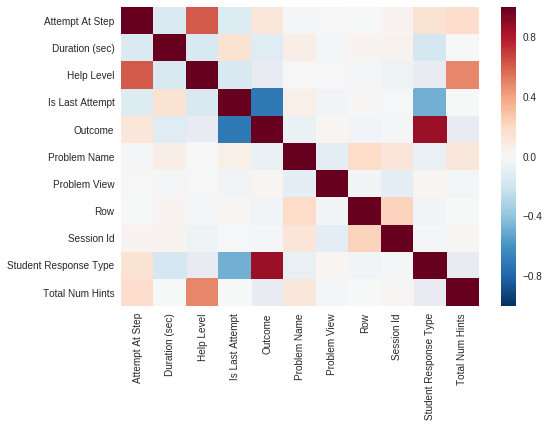

In [11]:
seaborn.heatmap(corr1);

As we see, there are some large (anti)correlations between the following features:
- correlation (0.87) between `'Outcome'` and `'Student Response Type'` (hints contribute to the largest values in both features); 
- correlation (0.61) between `'Attempt At Step'` and `'Help Level'` (making more steps for attempts generally means making more hints);
- correlation (0.49) between `'Help Level'` and `'Total Num Hints'` (number of subsequent hints clearly correlate with the total number of hints);
- anti-correlation (-0.72) between `'Is Last Attempt'` and `'Outcome'`;
- anti-correlation (-0.48) between `'Is Last Attempt'` and `'Student Response Type'` (a product of correlation between `'Outcome'` and `'Student Response Type'` and anti-correlation between `'Is Last Attempt'` and `'Outcome'`).

### Select features chosen for further analysis:

In [12]:
columns = ['Anon Student Id', \
           'Session Id', \
           'Duration (sec)', \
           'Student Response Type', \
           'Problem Name', \
           'Problem View', \
           'Attempt At Step', \
           'Outcome', \
           'Day']

In [13]:
data = data.copy()[columns]

### Add 'x' column:

**Note to reviewers**: this algorithm is quite slow (~25 minutes), so you may consider adding `'x'` variable (number of attempt) to a substantial subset of ASSISTments dataset (e.g. processing 100,000 rows takes only ~0.5 minutes).

In [14]:
def adding_x(df):
    j = 0
    start_time = time.time()
    df['x'] = 0
    df_attempts = df[df['Student Response Type'] == 0].copy()
    stud_list = df_attempts['Anon Student Id'].unique()
    for student in stud_list:
        print("\r\t>>> Progress\t:{:.4%}".format((j + 1)/len(stud_list)), end='')
        j += 1
        stud = []
        stud.append(student)
        data_stud = df_attempts[np.in1d(df_attempts['Anon Student Id'], stud)].copy()
        for problem in data_stud['Problem Name'].unique():
            prob = []
            prob.append(problem)
            data_prob = data_stud[np.in1d(data_stud['Problem Name'], prob)].copy()
            data_stud.loc[data_prob.index,'x'] = range(1,len(data_prob)+1)
        df_attempts.loc[data_stud.index,'x']  = data_stud['x']
    end_time = time.time()
    print("\n\t>>> Exec. time\t:{}s".format(end_time-start_time))
    return df_attempts

In [15]:
#data_x = adding_x(data.head(100000).copy())
data_x = adding_x(data.copy())
data['x'] = 0
data.loc[data_x.index,'x'] = data_x['x']
data[data['x'] > 0].shape

	>>> Progress	:100.0000%
	>>> Exec. time	:1407.3320195674896s


(1916511, 10)

### Write data to hdf, read back and compare

I read from and write to compressed hdf, see [performance comparison](http://pandas.pydata.org/pandas-docs/stable/io.html#performance-considerations):

In [16]:
def hdf_fixed_write_compress(df):
    df.to_hdf('data.hdf','test',mode='w',complib='blosc')
    return

def hdf_fixed_read_compress():
    df = pd.read_hdf('data.hdf','test')
    return df

In [17]:
hdf_fixed_write_compress(data)

data1 = hdf_fixed_read_compress()
ne = data[data != data1]
ne.dropna(axis=0, how='all', inplace=True)
ne.shape[0]

0

This file is too large to upload to Githib:

In [18]:
! ls -lh data.hdf

-rw-rw-r-- 1 dima806 dima806 73M Nov  6 14:17 data.hdf


, so I gzipped it:

In [19]:
with open('data.hdf', 'rb') as f_in, gzip.open('data.hdf.gz', 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

The obtained `data.hdf.gz` file is smaller than 25M, so I upload it to [my Github](https://github.com/Dima806/udacity-mlnd-capstone):

In [20]:
! ls -lh data.hdf.gz

-rw-rw-r-- 1 dima806 dima806 17M Nov  6 14:17 data.hdf.gz


### Create visualisation:

In [21]:
s1 = data[data['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2 = data[data['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1[8] = s1.loc[8:].sum()
for i in range(9, int(s1.index.max()+1)):
    try:
        s1.drop(i, inplace=True)
    except ValueError:
        pass

s2[8] = s2.loc[8:].sum()
for i in range(9, int(s2.index.max()+1)):
    try:
        s2.drop(i, inplace=True)
    except ValueError:
        pass

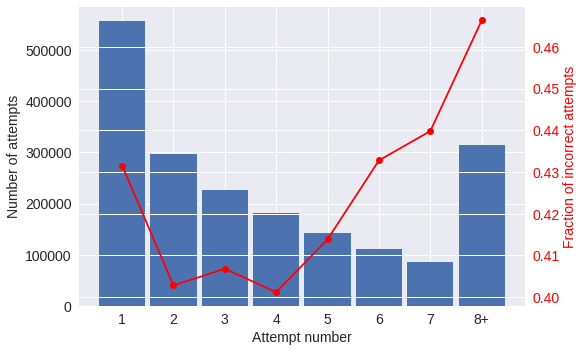

In [22]:
# In case of wrong x labelling, simply run this cell 2 times:

fig, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8.3
fig_size[1] = 4.7
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(0.5,8.5)
plt.bar(s1.index, s1, width=0.9)
#plt.bar(s2.index, s2, width=0.9)
#plt.legend(['CORRECT', 'INCORRECT'])

plt.xlabel("Attempt number", size=14)
plt.ylabel("Number of attempts", size=14)
ax1.tick_params(axis ='both', which='major', length=0, labelsize =14, color='black')
ax1.tick_params(axis ='both', which='minor', length=0)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
#print(labels)

ax2 = ax1.twinx()
ax2.plot(s1.index, s2/s1, 'r-o')
ax2.set_ylabel('Fraction of incorrect attempts', size=14, color='r')
ax2.tick_params('y', colors='r')
ax2.tick_params(axis ='both', which='minor', length=0)
ax2.tick_params(axis ='both', which='major', length=0, labelsize =14, color='red')

ax1.set_xticklabels(labels)

plt.show()
fig.savefig('data-visualisation.png')